In [12]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd

options = Options()
options.headless = True

driver = webdriver.Chrome(options=options, service=ChromeService(
    ChromeDriverManager().install()))
driver2 = webdriver.Chrome(options=options, service=ChromeService(
    ChromeDriverManager().install()))


In [2]:
url = 'https://www.transfermarkt.com/weltmeisterschaft-2022/gesamtspielplan/pokalwettbewerb/WM22/saison_id/2021'


In [4]:
driver.get(url)
nt = driver.find_elements(
    By.CSS_SELECTOR, '.large-6.columns .grid-view table.items tbody tr')


In [5]:
nt_list = []
for i in range(len(nt)):
    nt_name = nt[i].find_element(
        By.CSS_SELECTOR, 'td:nth-child(3) a:nth-child(1)').get_attribute('title')
    nt_url = nt[i].find_element(
        By.CSS_SELECTOR, 'td:nth-child(3) a:nth-child(1)').get_attribute('href')
    flag_url = nt[i].find_element(
        By.CSS_SELECTOR, 'td:nth-child(2) .flaggenrahmen').get_attribute('href')
    squad_url = f"{nt_url.replace('spielplan','kader')}/plus/1"
    nt_list.append({
        'nt_name': nt_name,
        'nt_url': nt_url,
        'flag_url': flag_url,
        'squad_url': squad_url,
    })
nt_df = pd.DataFrame(nt_list)
nt_df.to_excel('../../../data/wc22_team.xlsx')


In [13]:
def get_wc22_squad(driver, url):
    driver.get(url)
    players = driver.find_elements(By.CSS_SELECTOR, '#yw1 .items > tbody > tr')
    try:
        country = driver.find_element(
            By.CSS_SELECTOR, '.data-header__headline-container').text
    except:
        country = None
    player_list = []
    print(f"Get {country} squad :")
    for i in range(len(players)):
        name = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(2) table img').get_attribute('title')
        src = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(2) table img').get_attribute('data-src')
        dob = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(3)').get_attribute('innerHTML')
        club = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(4) a').get_attribute('title')
        club_url = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(4) a').get_attribute('href')
        height = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(5)').get_attribute('innerHTML')
        caps = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(7)').get_attribute('innerHTML')
        market_value = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(10)').get_attribute('innerHTML')
        position = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(2) tbody tr:nth-child(2) td').get_attribute('innerHTML').strip()
        print(f"{i+1}. {name} - {position}")        
        
        # driver2.get(club_url)
        # try:
        #     league = driver2.find_element(
        #         By.CSS_SELECTOR, '.data-header__box--big .data-header__club').text
        # except:
        #     league = None
        # try:
        #     league_country = driver2.find_element(
        #         By.CSS_SELECTOR, '.data-header__box--big .flaggenrahmen').get_attribute('title')
        # except:
        #     league_country = None
        # try:
        #     league_tier = driver2.find_element(
        #         By.CSS_SELECTOR, '.data-header__box--big .data-header__label .data-header__content a').text
        # except:
        #     league_tier = None

        player_list.append({
            'name': name,
            'position': position,
            'dob': dob,
            'club': club,
            'club_url': club_url,
            # 'league': league,
            # 'league_country': league_country,
            # 'league_tier': league_tier,
            'caps': caps,
            'height': height,
            'market_value': market_value,
            'country': country
        })
    player_df = pd.DataFrame(player_list).reset_index(drop=True)
    return player_df


In [14]:
nt_df = pd.read_excel('../../../data/wc22_team.xlsx',index_col=0)
li = list(nt_df['squad_url'])

In [15]:
sq_df = pd.DataFrame()
for i in range(len(li)):
    d = get_wc22_squad(driver,li[i])
    sq_df = pd.concat([sq_df,d]).reset_index(drop=True)

Get Netherlands squad :
1. Justin Bijlow - Goalkeeper
2. Andries Noppert - Goalkeeper
3. Remko Pasveer - Goalkeeper
4. Matthijs de Ligt - Centre-Back
5. Virgil van Dijk - Centre-Back
6. Jurrien Timber - Centre-Back
7. Nathan Aké - Centre-Back
8. Stefan de Vrij - Centre-Back
9. Tyrell Malacia - Left-Back
10. Daley Blind - Left-Back
11. Jeremie Frimpong - Right-Back
12. Teun Koopmeiners - Defensive Midfield
13. Marten de Roon - Defensive Midfield
14. Frenkie de Jong - Central Midfield
15. Kenneth Taylor - Central Midfield
16. Denzel Dumfries - Right Midfield
17. Xavi Simons - Attacking Midfield
18. Steven Berghuis - Attacking Midfield
19. Davy Klaassen - Attacking Midfield
20. Cody Gakpo - Left Winger
21. Steven Bergwijn - Left Winger
22. Noa Lang - Left Winger
23. Memphis Depay - Centre-Forward
24. Wout Weghorst - Centre-Forward
25. Vincent Janssen - Centre-Forward
26. Luuk de Jong - Centre-Forward
Get Senegal squad :
1. Edouard Mendy - Goalkeeper
2. Alfred Gomis - Goalkeeper
3. Seny Di

In [16]:
sq_df.to_excel("../../../data/wc22_squad.xlsx")

In [17]:
sq_df = pd.read_excel("../../../data/wc22_squad.xlsx",index_col=0)

In [29]:
def format_market_value(mv):
    mv = str(mv).replace('€','')
    if mv[-1] == 'm':
        val = int(float(mv[:-1])*1000000)
    elif mv[-1] == 'k':
        val = int(float(mv[:-1])*1000)
    else:
        val = int(str(mv).replace('-','0'))
    return val


In [33]:
def format_caps(cap):
    c = str(cap).replace('-','0')
    c = int(c)
    return c

In [38]:
def format_height(h):
    he = str(h).replace('-','0')
    he = he.replace('m','')
    he = he.replace(',','.')
    he = int(float(he)*100)
    return he

In [40]:
sq_df['market_value'] = sq_df['market_value'].map(
    lambda x: format_market_value(x))
sq_df['caps'] = sq_df['caps'].map(lambda x: format_caps(x))
sq_df['height'] = sq_df['height'].map(lambda x: format_height(x))


In [41]:
sq_df.groupby('club')['name'].count().reset_index(
    name='count').sort_values(['count'], ascending=False)


,club,count
45,Bayern Munich,17
170,Manchester City,16
106,FC Barcelona,16
26,Al-Sadd SC,15
171,Manchester United,14
...,...,...
140,Hearts of Oak,1
142,Hertha BSC,1
143,Hibernian FC,1
1,1.FC Union Berlin,1


In [42]:
import joypy
from matplotlib import pyplot as plt
from matplotlib import cm

In [126]:
df = sq_df.copy()
df['market_value'] = df['market_value']/1000000
df = df[df['market_value']!=0]
df = df[df['height']!=0]
# df = df[df['country'].isin(['England','Germany','Spain','France','Netherlands','Portugal','Belgium','Argentina','Brazil'])]

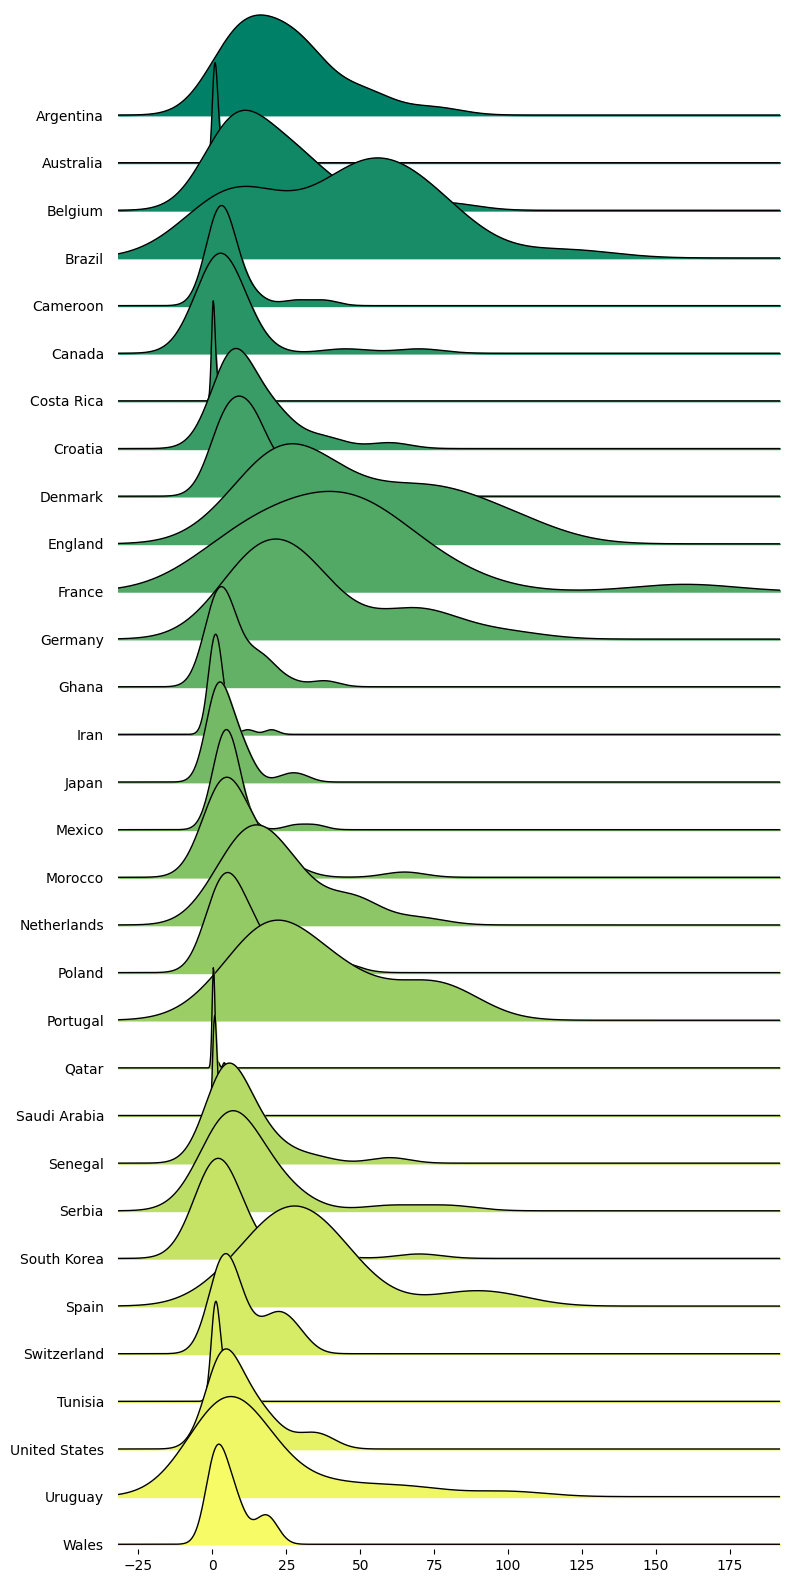

In [150]:
%matplotlib inline
fig, axes = joypy.joyplot(df,
                          by="country",
                          column=["market_value"],
                          figsize=(8, 16),
                          linewidth=1,
                          overlap=1,
                          colormap=cm.summer,
                          ylim="own",
                          tails=.2,
                          #   grid='x',
                          #   bins=40,
                          #   range_style='own'
                          #   kind="kde",
                          #   x_range=[-11000000, 110000000]
                          )
# axes[0].plot(0,5)
plt.show()
